In [2]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt

# Javeriana Cali


## Segundo parcial de Modelación y Simulación II

Por favor marque el archivo con us nombre de la siguiente manera: parcial2_nombre.ipynb


# Problema  1
Encontrar la formula variacional e implementar en fenics la siguiente ecuación de Poisson:

$$-\nabla\cdot(1/8+u^2)\nabla u=1$$
donde $\Omega=[0,1]\times[0,1]$ y $u=0$ en $\partial\Omega$.

R/ Podemos reescribir el problema como:
$$ -\nabla \cdot \alpha(u) \nabla u = 1 $$
con $\alpha(u) = (1/8 + u^2)$. Considere el espacio:
$$ V = \{ v \in H^1_0(\Omega): v|_{\partial \Omega}= 0 \} $$
Sean $u, v \in V$, entonces reescribiendo el problema se tiene:
$$ - \int_{\Omega} (\nabla \cdot \alpha(u) \nabla u)v \, dx = \int_{\Omega} v \, dx $$
Usando teorema de Green se obtiene que:
$$- \int_{\Omega} \Big( \nabla \cdot (\alpha(u)\nabla u) \Big) v \, dx = \int_{\Omega} \alpha(u) \nabla u \cdot \nabla v \, dx - \int_{\partial \Omega} \alpha(u) \frac{\partial u}{\partial \eta} v \, dS$$
como $v$ se anula $\partial \Omega$ el segundo termino de la derecha es 0, por lo tanto la formula variacional esta dada por:
$$ \int_{\Omega} \alpha(u) \nabla u \cdot \nabla v \, dx = \int_{\Omega} v \, dx $$


Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in err

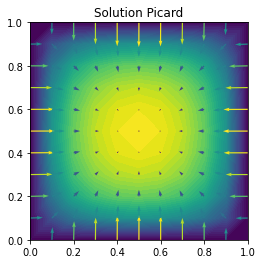

In [8]:
# Define mesh and function space
nx = ny = 10
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'Lagrange', 2)

# Define boundary condition
g = Constant(0.0)
bc = DirichletBC(V, g, 'on_boundary')

# Define parameters
def alpha_(u):
    return u*u + (1/8)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
u_k = interpolate(g,V)
a = alpha_(u_k)*inner(nabla_grad(u), nabla_grad(v))*dx
L = v*dx

# Picard iteration
u = Function(V)
eps = 1
tol = 1.0E-5
iter = 0
maxiter = 25
while eps > tol and iter < maxiter:
    iter += 1
    solve(a == L, u, bc)
    eps = errornorm(u_k, u, norm_type='L2', degree_rise=3)
    u_k.assign(u)

plot(u)
plot(nabla_grad(u), title="Solution Picard")

# Problema 2
Encontrar la formula variacional e implementar en fenics la siguiente ecuación
$$-\nabla^2 u=f,$$
donde $f(x,y)=\frac{e^{-(x-0.5)^2-(y-0.5)^2}}{0.02}$ y las condiciones de borde son
$u(x,y)=0$ para $x=0$ o $x=1$ y $u_x(x,y)=sin(5x)$ para $y=0$ o $y=1$, para $\Omega=[0,1]\times[0,1]$

R/ Considere el espacio:
$$ V = \{ v \in H^1_0(\Omega): v|_{\partial \Omega}= 0 \} $$
Sean $u, v \in V$, entonces reescribiendo el problema se tiene:
$$ - \Delta u = f $$
$$ - \int_{\Omega} \Delta u v \, dx = \int_{\Omega} f v \, dx $$
Aplicando teorema de Green en el lado izquierdo:
$$ - \int_{\Omega} \Delta u v \, dx = \int_{\Omega} \nabla u \cdot \nabla v \, dx - \int_{\partial \Omega} \frac{\partial u}{\partial \eta} v \, dS$$
Como $v$ se anula en la frontera, se tiene que:
$$ \int_{\Omega} \nabla u \cdot \nabla v \, dx = \int_{\Omega} f v \, dx $$

In [5]:
# Create mesh
nx = ny = 10
mesh = UnitSquareMesh(nx, ny)

# Define function space
V = FunctionSpace(mesh, 'Lagrange', 2)

# Define functions for boundary conditions
u_left = Constant(0.0)
u_right = Expression('sin(5*x[0])', degree=2)

# Define boundary conditions
def boundary_left(x, on_boundary):
    return on_boundary and (near(x[0], 0) or near(x[0], 1))

def boundary_right(x, on_boundary):
    return on_boundary and (near(x[1], 0) or near(x[1], 1))

bc_left = DirichletBC(V, u_left, boundary_left)
bc_right = DirichletBC(V, u_right, boundary_right)
bcs = [bc_left, bc_right]


Solving linear variational problem.


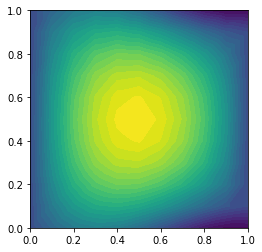

In [6]:
# Define vartional problem
f = Expression('exp(-pow(x[0]-0.5, 2)-pow(x[1]-0.5, 2))/0.02', degree=2)
u = TrialFunction(V)
v = TestFunction(V)
a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# Plot solution
plot(u)

# Problema 3

Sea le siguiente problema de valor inicial

$$\begin{cases}\frac{\partial u}{\partial t}=\frac{\partial }{\partial x}\Big(x^2\frac{\partial u}{\partial x}\Big)+(x+1)^2,\quad &\text{ en } [0,\pi]\times(0,T]\\u(0)=1,\\ u(1)=0,\\
u(x,0)=cos(\frac{\pi}{2} x)\end{cases}$$

a. Encontrar la formula variacional del problema.

b. Implementar la aproximación del problema en Fenics y resolverlo con el método de Galerkin. Graficar la solución.

R/ Podemos reescribir el problema como:
$$ \frac{\partial u}{\partial t} = \nabla \cdot (\alpha(x) \nabla u) + \beta(x)$$
con $\alpha(x) = x^2$ y $\beta(x) = (x+1)^2$. Defina los espacios:
$$ V \subset L^2(\Omega) = \{ v(\cdot, t) \in H^1([0,\pi]) : v(0,t) = 1, v(\pi,t) = 0 \} \cap \{ v(x, \cdot) \in H^1((0,T]) : v(x,0) = \cos (\frac{\pi}{2} x) \}$$ 
y
$$ \hat{V} \subset L^2(\Omega) = \{ v \in H^1_0([0,\pi]): v(0,t) = v(\pi, t) = 0 \}$$
Usando diferencias finitas obtenemos:
$$ \frac{u^k - u^{k-1}}{dt} = \nabla \cdot (\alpha(x) \nabla u^k) + \beta(x)$$
Sean $u^k \in V$ y $v \in \hat{V}$, integrnado sobre $\Omega$ obetenemos:
$$ \int_{\Omega} (u^k - u^{k-1})v \, dx = dt \int_{\Omega} (\nabla \cdot (\alpha(x) \nabla u^k) + \beta(x))v \, dx $$
$$ \int_{\Omega} v u^k - v u^{k-1}\, dx = dt \int_{\Omega} (\nabla \cdot (\alpha(x) \nabla u^k))v \, dx + dt \int_{\Omega} \beta(x) v \, dx $$

Aplicando teorema de Green en la primera integral del lado derecho obtenemos que:
$$ \int_{\Omega} (\nabla \cdot (\alpha(x) \nabla u^k))v \, dx = \int_{\partial \Omega} \alpha(x) \frac{\partial u^k}{\partial \eta} v \, dS - \int_{\Omega} \alpha(x) \nabla u^k \cdot \nabla v \, dx $$
pero $v$ se anula en la frontera, por lo que el primer termino es 0, entonces:

$$ \int_{\Omega} v u^k - v u^{k-1}\, dx = - dt \int_{\Omega} \alpha(x) \nabla u^k \cdot \nabla v \, dx + dt \int_{\Omega} \beta(x) v \, dx $$
$$ \int_{\Omega} v u^k + dt (\alpha(x) \nabla u^k \cdot \nabla v) \, dx = \int_{\Omega} \beta(x) v + v u^{k-1} \, dx $$
$$ \int_{\Omega} v u^k + dt (\alpha(x) \nabla u^k \cdot \nabla v) \, dx = \int_{\Omega} (\beta(x) + u^{k-1})v $$


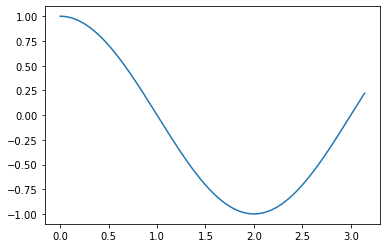

In [18]:
#Discretization
T = 1 # final time
num_steps = 50 # number of time steps
dt = T / num_steps # time step size

# Define mesh and function space
nx = ny = 10
mesh = IntervalMesh(200, 0, np.pi)
#mesh = UnitSquareMesh(nx, ny)

V = FunctionSpace(mesh, 'Lagrange', 1)

# Define the boundary condition
bc = [DirichletBC(V, Constant(1.0), "near(x[0], 0)"),
      DirichletBC(V, Constant(0.0), "near(x[0], pi)")]

# Define the initial condition, u(t=0, x) = sin(x)
initial_condition = Expression("cos((pi / 2) * x[0])", degree=1)
u_k_old = interpolate(initial_condition, V)
plot(u_k_old)

Solving linear variational problem.
time = 0.02: error = 9.6
time = 0.04: error = 8.08
Solving linear variational problem.
Solving linear variational problem.
time = 0.06: error = 7.18
Solving linear variational problem.
time = 0.08: error = 6.54
Solving linear variational problem.
time = 0.10: error = 6.06
Solving linear variational problem.
time = 0.12: error = 5.68
Solving linear variational problem.
time = 0.14: error = 5.37
Solving linear variational problem.
time = 0.16: error = 5.11
Solving linear variational problem.
time = 0.18: error = 4.88
Solving linear variational problem.
time = 0.20: error = 4.68
Solving linear variational problem.
time = 0.22: error = 4.51
time = 0.24: error = 4.36
Solving linear variational problem.
Solving linear variational problem.
time = 0.26: error = 4.22
Solving linear variational problem.
time = 0.28: error = 4.09
Solving linear variational problem.
time = 0.30: error = 3.98
Solving linear variational problem.
time = 0.32: error = 3.87
Solving l

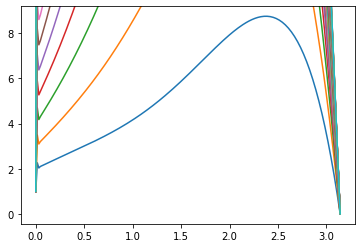

In [19]:
# Define the variational problem
u = TrialFunction(V)
v = TestFunction(V)
alpha = Expression("x[0]*x[0]", degree=2)
beta = Expression(" (x[0] + 1) * (x[0] + 1)", degree=2)

a = u*v*dx + dt*alpha*inner(nabla_grad(u), nabla_grad(v))*dx
L = (beta + u_k_old)*v*dx

# Time-stepping
u = Function(V)
t = 0
fid = File("parcial2/solution3.pvd")
while t <= T:
    # Update time
    t += dt
    u_k_old.t = t
    # Solve variational problem at current time step
    solve(a == L, u, bc)
    # Plot solution
    plot(u)
    # Compute error at vertices
    u_e = interpolate(u_k_old, V)
    error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    print('time = %.2f: error = %.3g' % (t, error))
    # Update previous solution
    u_k_old.assign(u)
    # Save solution through time to visualize in paraview
    fid << u, t